# $\fbox{2-1}$「患者調査」の利用

## 患者調査

### 調査期間

### 受療率の算出に用いた人口

### 詳細な統計 (e-Stat)

### 疾病、傷害及び死因の統計分類 (ICD)

## 受療率の算出に用いた人口

### 読み込みと整形

In [1]:
# グラフを移動拡大縮小したい場合
%matplotlib notebook
# グラフをインラインで表示
# %matplotlib inline

import gc

import mylibs.mylib1 as mylib1  # 本書 1 章の関数群を含む自作ライブラリ
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# 表示する行・列の数を設定
pd.options.display.max_rows = 6
pd.options.display.max_columns = 10

# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
df_pop = pd.read_csv('./public_stats/processed/ps_pop.csv')

df_pop

,alb_min,alb_max,M,F
0,0,0,493,470
1,1,4,2020,1927
2,5,9,2690,2561
...,...,...,...,...
17,80,84,2157,3137
18,85,89,1173,2222
19,90,130,496,1559


## 月次新入院発生件数

### 読み込みと整形

In [3]:
df_hosp = pd.read_csv('./public_stats/original/ps_hosp.csv', skiprows=13, encoding='cp932')
df_hosp

,表章項目,入院－外来_010,性別_001,年齢階級_003,/傷病小分類_004_29,...,１５ 妊娠，分娩及び産じょく,１６ 周産期に発生した病態,１７ 先天奇形，変形及び染色体異常,１８ 症状，徴候及び異常臨床所見・異常検査所見で他に分類されないもの,１９ 損傷，中毒及びその他の外因の影響
0,推計患者数【千人】,新入院,男,０歳,NaN,...,･,0.3,0.0,0.0,0.0
1,推計患者数【千人】,新入院,男,１～４歳,NaN,...,･,-,0.1,0.0,0.1
2,推計患者数【千人】,新入院,男,５～９歳,NaN,...,･,-,0.0,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...
73,推計患者数【千人】,外来,女,７５～７９歳,NaN,...,-,-,0.2,4.3,14.4
74,推計患者数【千人】,外来,女,８０～８４歳,NaN,...,-,-,0.1,3.9,11.2
75,推計患者数【千人】,外来,女,８５歳以上,NaN,...,-,-,0.1,4.0,13.6


In [4]:
cols = df_hosp.columns[2:]
df_admission = df_hosp.loc[df_hosp['入院－外来_010'] == '新入院', cols]
df_outpatient = df_hosp.loc[df_hosp['入院－外来_010'] == '外来', cols]

df_admission.head()

,性別_001,年齢階級_003,/傷病小分類_004_29,１ 感染症及び寄生虫症,２ 新生物＜腫瘍＞,...,１５ 妊娠，分娩及び産じょく,１６ 周産期に発生した病態,１７ 先天奇形，変形及び染色体異常,１８ 症状，徴候及び異常臨床所見・異常検査所見で他に分類されないもの,１９ 損傷，中毒及びその他の外因の影響
0,男,０歳,NaN,0.0,0.0,...,･,0.3,0.0,0.0,0.0
1,男,１～４歳,NaN,0.0,0.0,...,･,-,0.1,0.0,0.1
2,男,５～９歳,NaN,0.0,0.0,...,･,-,0.0,0.0,0.1
3,男,１０～１４歳,NaN,0.0,0.0,...,･,0.0,0.0,0.0,0.1
4,男,１５～１９歳,NaN,0.0,0.0,...,･,-,-,0.0,0.1


In [5]:
print(df_admission[cols[2]].notnull().sum())  # NaN でない値の数
df_admission = df_admission.drop(cols[2], axis=1)

df_admission.head()

0


,性別_001,年齢階級_003,１ 感染症及び寄生虫症,２ 新生物＜腫瘍＞,３ 血液及び造血器の疾患並びに免疫機構の障害,...,１５ 妊娠，分娩及び産じょく,１６ 周産期に発生した病態,１７ 先天奇形，変形及び染色体異常,１８ 症状，徴候及び異常臨床所見・異常検査所見で他に分類されないもの,１９ 損傷，中毒及びその他の外因の影響
0,男,０歳,0.0,0.0,0.0,...,･,0.3,0.0,0.0,0.0
1,男,１～４歳,0.0,0.0,0.0,...,･,-,0.1,0.0,0.1
2,男,５～９歳,0.0,0.0,0.0,...,･,-,0.0,0.0,0.1
3,男,１０～１４歳,0.0,0.0,-,...,･,0.0,0.0,0.0,0.1
4,男,１５～１９歳,0.0,0.0,0.0,...,･,-,-,0.0,0.1


In [6]:
df_admission.columns

Index(['性別_001', '年齢階級_003', '１　感染症及び寄生虫症', '２　新生物＜腫瘍＞',
       '３　血液及び造血器の疾患並びに免疫機構の障害', '４　内分泌，栄養及び代謝疾患', '５　精神及び行動の障害', '６　神経系の疾患',
       '７　眼及び付属器の疾患', '８　耳及び乳様突起の疾患', '９　循環器系の疾患', '１０　呼吸器系の疾患', '１１　消化器系の疾患',
       '１２　皮膚及び皮下組織の疾患', '１３　筋骨格系及び結合組織の疾患', '１４　腎尿路生殖器系の疾患', '１５　妊娠，分娩及び産じょく',
       '１６　周産期に発生した病態', '１７　先天奇形，変形及び染色体異常',
       '１８　症状，徴候及び異常臨床所見・異常検査所見で他に分類されないもの', '１９　損傷，中毒及びその他の外因の影響'],
      dtype='object')

In [7]:
idx = ['sex', 'alb', 'A00', 'C00', 'D50', 'E00', 'F00', 'G00', 'H00', 'H60', 'I00',
       'J00', 'K00', 'L00', 'M00', 'N00', 'O00', 'P00', 'Q00', 'R00', 'S00']

In [8]:
df_admission = df_admission.T.reset_index()  # 'index' という列が新しく作成される
del df_admission['index']                    # reset_index() によって作られた 'index' 列を削除
df_admission.index = idx                     # 代表 ICD-10 に置き換える
df_admission = df_admission.T

df_admission.head()

,sex,alb,A00,C00,D50,...,O00,P00,Q00,R00,S00
0,男,０歳,0,0,0.0,...,･,0.3,0.0,0.0,0
1,男,１～４歳,0,0,0.0,...,･,-,0.1,0.0,0.1
2,男,５～９歳,0,0,0.0,...,･,-,0.0,0.0,0.1
3,男,１０～１４歳,0,0,-,...,･,0.0,0.0,0.0,0.1
4,男,１５～１９歳,0,0,0.0,...,･,-,-,0.0,0.1


In [9]:
alb_min = [0, 1]
alb_min.extend(np.arange(17)*5+5)
alb_min.extend(alb_min)
df_admission['alb_min'] = alb_min

alb_max = [0, 4]
alb_max.extend(np.arange(16)*5+9)
alb_max.extend([130])
alb_max.extend(alb_max)
df_admission['alb_max'] = alb_max

del df_admission['alb']

df_admission

,sex,A00,C00,D50,E00,...,Q00,R00,S00,alb_min,alb_max
0,男,0,0,0.0,0,...,0.0,0.0,0,0,0
1,男,0,0,0.0,0,...,0.1,0.0,0.1,1,4
2,男,0,0,0.0,0,...,0.0,0.0,0.1,5,9
...,...,...,...,...,...,...,...,...,...,...,...
35,女,0,0.6,0.0,0.1,...,0.0,0.0,0.4,75,79
36,女,0.1,0.5,0.0,0.1,...,0.0,0.1,0.5,80,84
37,女,0.1,0.5,0.1,0.2,...,-,0.1,0.9,85,130


In [10]:
cols = ['sex', 'alb_min', 'alb_max']
cols.extend(df_admission.columns[1:-2])
df_admission = df_admission[cols]

df_admission['sex'] = np.concatenate([np.repeat('M', 19), np.repeat('F', 19)])

df_admission

,sex,alb_min,alb_max,A00,C00,...,O00,P00,Q00,R00,S00
0,M,0,0,0,0,...,･,0.3,0.0,0.0,0
1,M,1,4,0,0,...,･,-,0.1,0.0,0.1
2,M,5,9,0,0,...,･,-,0.0,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...
35,F,75,79,0,0.6,...,-,-,0.0,0.0,0.4
36,F,80,84,0.1,0.5,...,-,-,0.0,0.1,0.5
37,F,85,130,0.1,0.5,...,-,-,-,0.1,0.9


In [11]:
df_admission = df_admission.replace('-', 0)
df_admission = df_admission.replace('･', 0)
df_admission[df_admission.columns[1:]
             ] = df_admission[df_admission.columns[1:]].astype('float32')

df_admission

,sex,alb_min,alb_max,A00,C00,...,O00,P00,Q00,R00,S00
0,M,0.0,0.0,0.0,0.0,...,0.0,0.3,0.0,0.0,0.0
1,M,1.0,4.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.1
2,M,5.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...
35,F,75.0,79.0,0.0,0.6,...,0.0,0.0,0.0,0.0,0.4
36,F,80.0,84.0,0.1,0.5,...,0.0,0.0,0.0,0.1,0.5
37,F,85.0,130.0,0.1,0.5,...,0.0,0.0,0.0,0.1,0.9


In [12]:
cols = df_admission.columns[3:]
df_admission[cols] = df_admission[cols] * 365 * 6 / 7 / 12

df_admission

,sex,alb_min,alb_max,A00,C00,...,O00,P00,Q00,R00,S00
0,M,0.0,0.0,0.000000,0.000000,...,0.0,7.82143,0.000000,0.000000,0.000000
1,M,1.0,4.0,0.000000,0.000000,...,0.0,0.00000,2.607143,0.000000,2.607143
2,M,5.0,9.0,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,2.607143
...,...,...,...,...,...,...,...,...,...,...,...
35,F,75.0,79.0,0.000000,15.642859,...,0.0,0.00000,0.000000,0.000000,10.428572
36,F,80.0,84.0,2.607143,13.035714,...,0.0,0.00000,0.000000,2.607143,13.035714
37,F,85.0,130.0,2.607143,13.035714,...,0.0,0.00000,0.000000,2.607143,23.464287


In [13]:
cols = df_hosp.columns[2:]

# df_outpatient の 2 列目は全て NaN なので、削除
df_outpatient = df_outpatient.drop(cols[2], axis=1)

# 傷病分類と ICD1-10 の対応表より、傷病分類を 1 つの ICD-10 コードで代表
df_outpatient = df_outpatient.T.reset_index()  
del df_outpatient['index']                    # reset_index() によって作られた 'index' 列を削除
df_outpatient.index = idx                     # 代表 ICD-10 に置き換える
df_outpatient = df_outpatient.T

# 年齢区分を、年齢の最小値 alb_min と最大値 alb_max に置き換えて、alb を削除
alb_min = [0, 1]
alb_min.extend(np.arange(17)*5+5)
alb_min.extend(alb_min)
df_outpatient['alb_min'] = alb_min
alb_max = [0, 4]
alb_max.extend(np.arange(16)*5+9)
alb_max.extend([130])
alb_max.extend(alb_max)
df_outpatient['alb_max'] = alb_max
del df_outpatient['alb']

# sex の値を (M,F) に変換して、列を並べ替え
cols = ['sex', 'alb_min', 'alb_max']
cols.extend(df_outpatient.columns[1:-2])
df_outpatient = df_outpatient[cols]
df_outpatient['sex'] = np.concatenate([np.repeat('M', 19), np.repeat('F', 19)])

# 「-」と「・」を数値の「0」に置き換え
df_outpatient = df_outpatient.replace('-', 0)
df_outpatient = df_outpatient.replace('･', 0)
df_outpatient[df_outpatient.columns[1:]] = df_outpatient[df_outpatient.columns[1:]].astype('float32')

# 月次発生件数への変換
cols = df_outpatient.columns[3:]
df_outpatient[cols] = df_outpatient[cols] * 365 * 6 / 7 / 12

df_outpatient

,sex,alb_min,alb_max,A00,C00,...,O00,P00,Q00,R00,S00
38,M,0.0,0.0,33.892857,5.214286,...,0.0,26.071428,31.285719,20.857143,18.250000
39,M,1.0,4.0,205.964294,5.214286,...,0.0,13.035714,39.107143,39.107143,130.357147
40,M,5.0,9.0,247.678574,13.035714,...,0.0,2.607143,18.250000,39.107143,179.892868
...,...,...,...,...,...,...,...,...,...,...,...
73,F,75.0,79.0,164.250000,349.357147,...,0.0,0.000000,5.214286,112.107155,375.428589
74,F,80.0,84.0,138.178574,265.928558,...,0.0,0.000000,2.607143,101.678566,292.000000
75,F,85.0,130.0,132.964279,218.999985,...,0.0,0.000000,2.607143,104.285713,354.571411


## 月次新入院発生率（回数）

In [14]:
def get_pop_num(df_pop, sex, alb_min, alb_max):
    more_alb_min = (df_pop.alb_min >= alb_min)
    less_alb_max = (df_pop.alb_max <= alb_max)
    return df_pop.loc[more_alb_min & less_alb_max, sex].sum()


get_pop_num(df_pop, 'M', 85, 130)

1669

In [15]:
cols = df_admission.columns[3:]

for i in df_admission.index:
    sex = df_admission.loc[i, 'sex']
    alb_min = df_admission.loc[i, 'alb_min']
    alb_max = df_admission.loc[i, 'alb_max']
    df_admission.loc[i, cols] = df_admission.loc[i, cols] / \
        get_pop_num(df_pop, sex, alb_min, alb_max)

df_admission

,sex,alb_min,alb_max,A00,C00,...,O00,P00,Q00,R00,S00
0,M,0.0,0.0,0.000000,0.000000,...,0.0,0.015865,0.000000,0.000000,0.000000
1,M,1.0,4.0,0.000000,0.000000,...,0.0,0.000000,0.001291,0.000000,0.001291
2,M,5.0,9.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000969
...,...,...,...,...,...,...,...,...,...,...,...
35,F,75.0,79.0,0.000000,0.004194,...,0.0,0.000000,0.000000,0.000000,0.002796
36,F,80.0,84.0,0.000831,0.004155,...,0.0,0.000000,0.000000,0.000831,0.004155
37,F,85.0,130.0,0.000690,0.003448,...,0.0,0.000000,0.000000,0.000690,0.006206


In [16]:
df_admission.to_csv('./public_stats/processed/ps_admission.csv', index=False)

### 年齢別入院回数の可視化

<IPython.core.display.Javascript object>


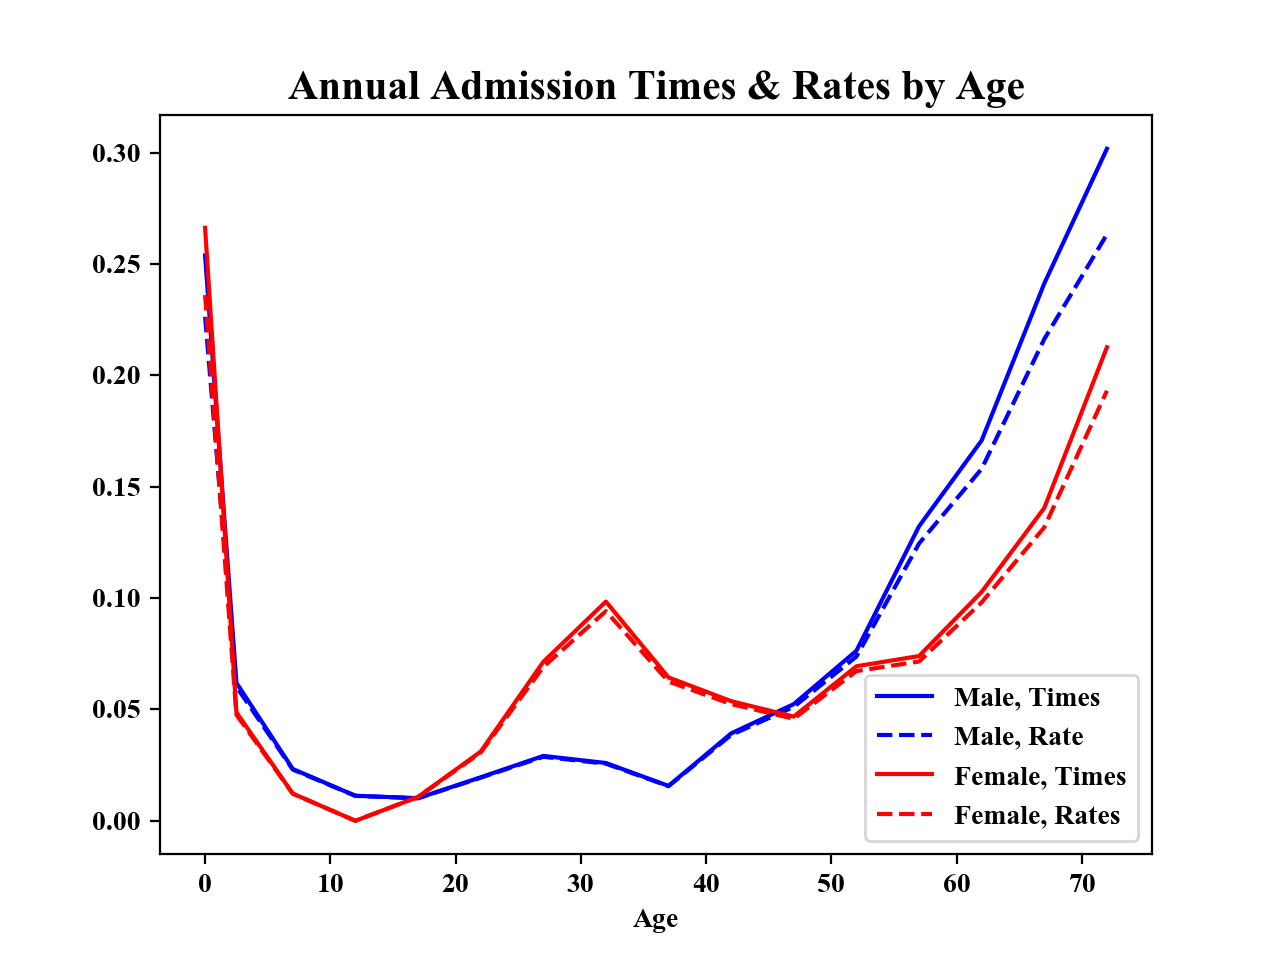

Text(0.5, 1.0, 'Annual Admission Times & Rates by Age')

In [17]:
df = df_admission[df_admission.alb_max <= 74]

fig = plt.figure()
ax = fig.subplots()

df_M = df.loc[df.sex == 'M']
x = (df_M.alb_min + df_M.alb_max) / 2
y = df_M[cols].sum(axis=1)
ax.plot(x, y*12, c='b', label='Male, Times')                   # 月次発生回数に変換
ax.plot(x, 1-(1-y)**12, c='b', ls='--', label='Male, Rate')    # 月次発生率を年次に変換

df_F = df.loc[df.sex == 'F']
x = (df_F.alb_min + df_F.alb_max) / 2
y = df_F[cols].sum(axis=1)
ax.plot(x, y*12, c='r', label='Female, Times')                 # 月次発生回数に変換
ax.plot(x, 1-(1-y)**12, c='r', ls='--', label='Female, Rates') # 月次発生率を年次に変換

ax.set_xlabel('Age')
ax.legend(loc='best')
ax.set_title('Annual Admission Times & Rates by Age', fontsize=15)

## 月次外来発生率（回数）

In [18]:
cols = df_outpatient.columns[3:]

for i in df_outpatient.index:
    sex = df_outpatient.loc[i, 'sex']
    alb_min = df_outpatient.loc[i, 'alb_min']
    alb_max = df_outpatient.loc[i, 'alb_max']
    df_outpatient.loc[i, cols] = df_outpatient.loc[i, cols] / \
        get_pop_num(df_pop, sex, alb_min, alb_max)

df_outpatient

,sex,alb_min,alb_max,A00,C00,...,O00,P00,Q00,R00,S00
38,M,0.0,0.0,0.068748,0.010577,...,0.0,0.052883,0.063460,0.042307,0.037018
39,M,1.0,4.0,0.101963,0.002581,...,0.0,0.006453,0.019360,0.019360,0.064533
40,M,5.0,9.0,0.092074,0.004846,...,0.0,0.000969,0.006784,0.014538,0.066875
...,...,...,...,...,...,...,...,...,...,...,...
73,F,75.0,79.0,0.044035,0.093661,...,0.0,0.000000,0.001398,0.030056,0.100651
74,F,80.0,84.0,0.044048,0.084772,...,0.0,0.000000,0.000831,0.032413,0.093083
75,F,85.0,130.0,0.035166,0.057921,...,0.0,0.000000,0.000690,0.027582,0.093777


In [19]:
df_outpatient.to_csv('./public_stats/processed/ps_outpatient.csv', index=False)

### 年齢別外来回数の可視化

<IPython.core.display.Javascript object>


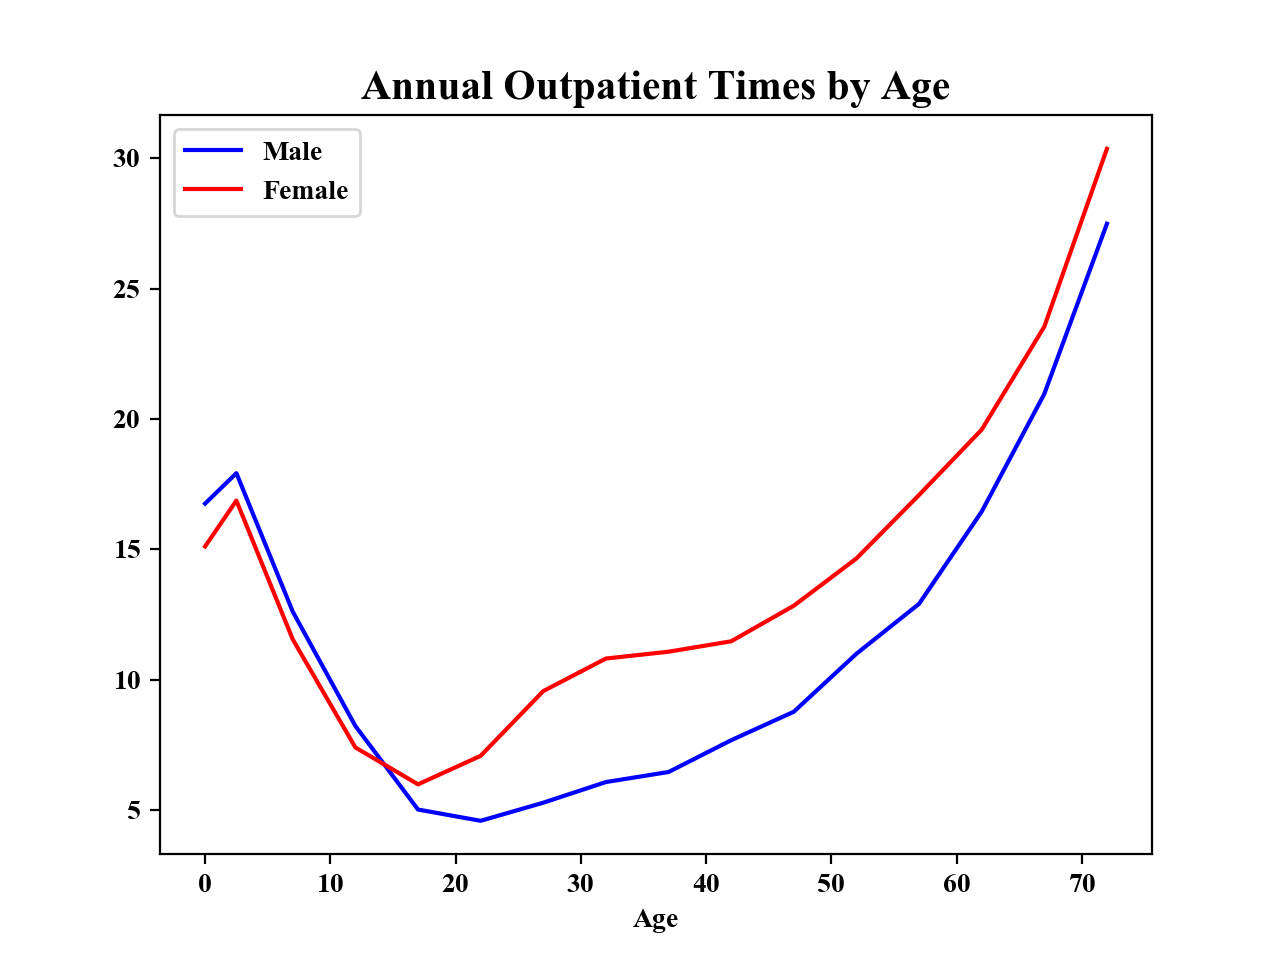

Text(0.5, 1.0, 'Annual Outpatient Times by Age')

In [20]:
df = df_outpatient[df_outpatient.alb_max <= 74]

fig = plt.figure()
ax = fig.subplots()

df_M = df.loc[df.sex == 'M']
x = (df_M.alb_min + df_M.alb_max) / 2
y = df_M[cols].sum(axis=1) * 12      # 月次発生回数を年次に変換
ax.plot(x, y, c='b', label='Male')

df_F = df.loc[df.sex == 'F']
x = (df_F.alb_min + df_F.alb_max) / 2
y = df_F[cols].sum(axis=1) * 12      # 月次発生回数を年次に変換
ax.plot(x, y, c='r', label='Female')

ax.set_xlabel('Age')
ax.legend(loc='best')
ax.set_title('Annual Outpatient Times by Age', fontsize=15)

## 退院患者平均在院日数

In [21]:
df_days = pd.read_csv('./public_stats/original/ps_days.csv', skiprows=13)

df_days

,表章項目,病院－一般診療所_002,性別_001,年齢階級_004,/傷病大分類_003,...,１５ 妊娠，分娩及び産じょく,１６ 周産期に発生した病態,１７ 先天奇形，変形及び染色体異常,１８ 症状，徴候及び異常臨床所見・異常検査所見で他に分類されないもの,１９ 損傷，中毒及びその他の外因の影響
0,退院患者平均在院日数【日】,総数,男,０歳,NaN,...,･,11.3,16.1,4.0,2.6
1,退院患者平均在院日数【日】,総数,男,１～４歳,NaN,...,･,38.7,7.5,3.1,1.7
2,退院患者平均在院日数【日】,総数,男,５～９歳,NaN,...,･,8.2,7.6,2.9,4.1
...,...,...,...,...,...,...,...,...,...,...,...
37,退院患者平均在院日数【日】,総数,女,８０～８４歳,NaN,...,-,-,51.9,34.3,42.6
38,退院患者平均在院日数【日】,総数,女,８５～８９歳,NaN,...,-,-,30.0,31.8,47.4
39,退院患者平均在院日数【日】,総数,女,９０歳以上,NaN,...,-,-,201.0,55.4,63.7


In [22]:
cols = df_days.columns[2:]
df_days = df_days[cols]
df_days = df_days.drop(cols[2], axis=1)

cols = ['sex', 'alb']
cols.extend(df_admission.columns[3:])
df_days.columns = cols

df_days

,sex,alb,A00,C00,D50,...,O00,P00,Q00,R00,S00
0,男,０歳,4.5,9.3,9.1,...,･,11.3,16.1,4.0,2.6
1,男,１～４歳,3.8,12.1,8.4,...,･,38.7,7.5,3.1,1.7
2,男,５～９歳,7.7,16.0,11.0,...,･,8.2,7.6,2.9,4.1
...,...,...,...,...,...,...,...,...,...,...,...
37,女,８０～８４歳,28.1,21.8,22.5,...,-,-,51.9,34.3,42.6
38,女,８５～８９歳,39.1,26.9,25.7,...,-,-,30.0,31.8,47.4
39,女,９０歳以上,71.1,52.5,28.0,...,-,-,201.0,55.4,63.7


In [23]:
# 年齢区分を、年齢の最小値 alb_min と最大値 alb_max に置き換えて、alb を削除
alb_min = [0, 1]
alb_min.extend(np.arange(18)*5+5)
alb_min.extend(alb_min)
df_days['alb_min'] = alb_min
alb_max = [0, 4]
alb_max.extend(np.arange(17)*5+9)
alb_max.extend([130])
alb_max.extend(alb_max)
df_days['alb_max'] = alb_max
del df_days['alb']

# sex の値を (M,F) に変換して、列を並べ替え
cols = ['sex', 'alb_min', 'alb_max']
cols.extend(df_days.columns[1:-2])
df_days = df_days[cols]
df_days['sex'] = np.concatenate([np.repeat('M', 20), np.repeat('F', 20)])

# 「-」と「・」を数値の「0」に置き換え
df_days = df_days.replace('-', 0)
df_days = df_days.replace('･', 0)
df_days[df_days.columns[1:]] = df_days[df_days.columns[1:]].astype('float32')

df_days

,sex,alb_min,alb_max,A00,C00,...,O00,P00,Q00,R00,S00
0,M,0.0,0.0,4.500000,9.300000,...,0.0,11.300000,16.100000,4.000000,2.600000
1,M,1.0,4.0,3.800000,12.100000,...,0.0,38.700001,7.500000,3.100000,1.700000
2,M,5.0,9.0,7.700000,16.000000,...,0.0,8.200000,7.600000,2.900000,4.100000
...,...,...,...,...,...,...,...,...,...,...,...
37,F,80.0,84.0,28.100000,21.799999,...,0.0,0.000000,51.900002,34.299999,42.599998
38,F,85.0,89.0,39.099998,26.900000,...,0.0,0.000000,30.000000,31.799999,47.400002
39,F,90.0,130.0,71.099998,52.500000,...,0.0,0.000000,201.000000,55.400002,63.700001


In [24]:
df_days = df_days[df_days.alb_min != 90].copy()
df_days.loc[df_days.alb_max == 89, 'alb_max'] = 130
df_days = df_days.reset_index()
del df_days['index']

df_days

,sex,alb_min,alb_max,A00,C00,...,O00,P00,Q00,R00,S00
0,M,0.0,0.0,4.500000,9.300000,...,0.0,11.300000,16.100000,4.000000,2.600000
1,M,1.0,4.0,3.800000,12.100000,...,0.0,38.700001,7.500000,3.100000,1.700000
2,M,5.0,9.0,7.700000,16.000000,...,0.0,8.200000,7.600000,2.900000,4.100000
...,...,...,...,...,...,...,...,...,...,...,...
35,F,75.0,79.0,20.100000,18.400000,...,0.0,0.000000,123.900002,38.400002,34.700001
36,F,80.0,84.0,28.100000,21.799999,...,0.0,0.000000,51.900002,34.299999,42.599998
37,F,85.0,130.0,39.099998,26.900000,...,0.0,0.000000,30.000000,31.799999,47.400002


In [25]:
df_days.to_csv('./public_stats/processed/ps_days.csv', index=False)

### 平均在院日数の可視化

In [26]:
cols = df_admission.columns[3:]
is_F = (df_admission.sex == 'F')
is_age_10 = (df_admission.alb_min == 10)

df_admission.loc[is_F & is_age_10, cols].sum().sum()

0.0

In [27]:
def calc_days_avg(df_admission, df_days, delta):
    df_admission_adj = df_admission[cols] + delta
    days = (df_admission_adj * df_days[cols]
            ).sum(axis=1) / df_admission_adj.sum(axis=1)
    df_days_avg = pd.concat(
        [df_days[['sex', 'alb_min', 'alb_max']], days], axis=1)
    df_days_avg.columns = ['sex', 'alb_min', 'alb_max', 'days']
    return df_days_avg


df_days_avg = calc_days_avg(df_admission, df_days, 0)
df_days_avg3 = calc_days_avg(df_admission, df_days, 0.1**3)
df_days_avg6 = calc_days_avg(df_admission, df_days, 0.1**6)

df_days_avg

,sex,alb_min,alb_max,days
0,M,0.0,0.0,9.650001
1,M,1.0,4.0,4.700000
2,M,5.0,9.0,4.450000
...,...,...,...,...
35,F,75.0,79.0,25.209373
36,F,80.0,84.0,52.179413
37,F,85.0,130.0,56.838455


<IPython.core.display.Javascript object>


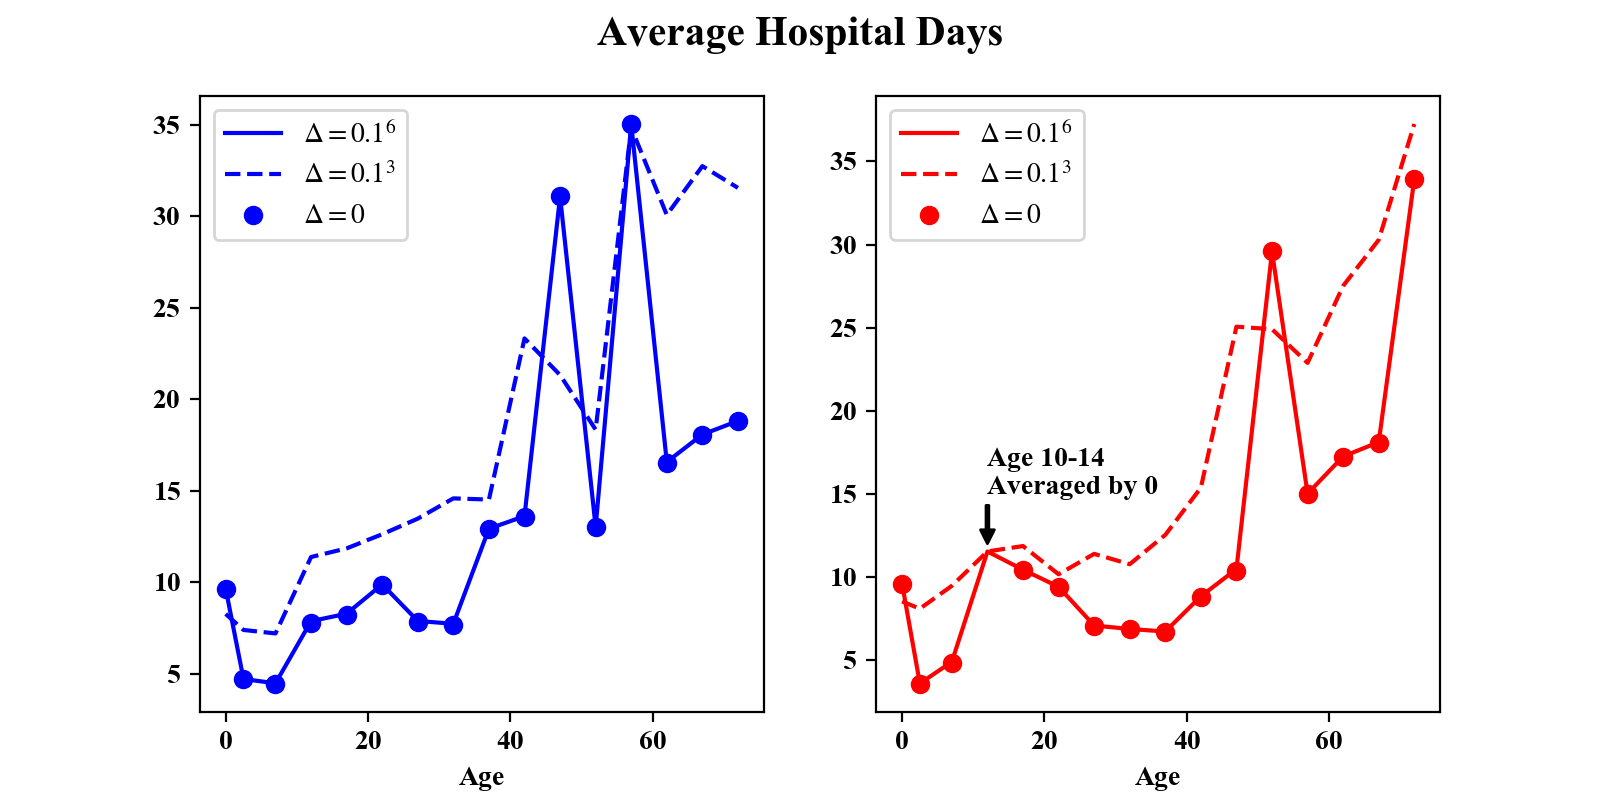

Text(12, 15, 'Age 10-14 \nAveraged by 0')

In [28]:
def add_chart(ax, df, sex, chart, color, label, ls='-'):
    df_sex = df.loc[df.sex == sex]
    x = (df_sex.alb_min + df_sex.alb_max) / 2
    y = df_sex.days
    if chart == 'plot':
        ax.plot(x, y, c=color, label=label, ls=ls)
    else:
        ax.scatter(x, y, c=color, label=label)


df = df_days_avg[df_days_avg.alb_max <= 74]
df6 = df_days_avg6[df_days_avg6.alb_max <= 74]
df3 = df_days_avg3[df_days_avg3.alb_max <= 74]

fig = plt.figure(figsize=(8, 4))
fig.suptitle('Average Hospital Days', fontsize=15)
# 男性
ax1 = fig.add_subplot(121)
add_chart(ax1, df, 'M', 'scatter', 'b', r'$\Delta=0$')
add_chart(ax1, df6, 'M', 'plot', 'b', r'$\Delta=0.1^6$')
add_chart(ax1, df3, 'M', 'plot', 'b', r'$\Delta=0.1^3$', ls='--')
ax1.legend(loc='best')
ax1.set_xlabel('Age')
# 女性
ax2 = fig.add_subplot(122)
add_chart(ax2, df, 'F', 'scatter', 'r', r'$\Delta=0$')
add_chart(ax2, df6, 'F', 'plot', 'r', r'$\Delta=0.1^6$')
add_chart(ax2, df3, 'F', 'plot', 'r', r'$\Delta=0.1^3$', ls='--')
ax2.legend(loc='best')
ax2.set_xlabel('Age')

ax2.annotate('Age 10-14 \nAveraged by 0', xy=[12, 12], xytext=[12, 15],
             arrowprops=dict(shrink=0, width=1, headwidth=5,
                             headlength=5, connectionstyle='arc3',
                             facecolor='k', edgecolor='k')
             )

## まとめ